In [1]:
!pip install wordcloud==1.8.2.2

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [12]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time

df = pd.read_csv("/work/hotel_reviews_df_cleaned_with_Tag.csv");

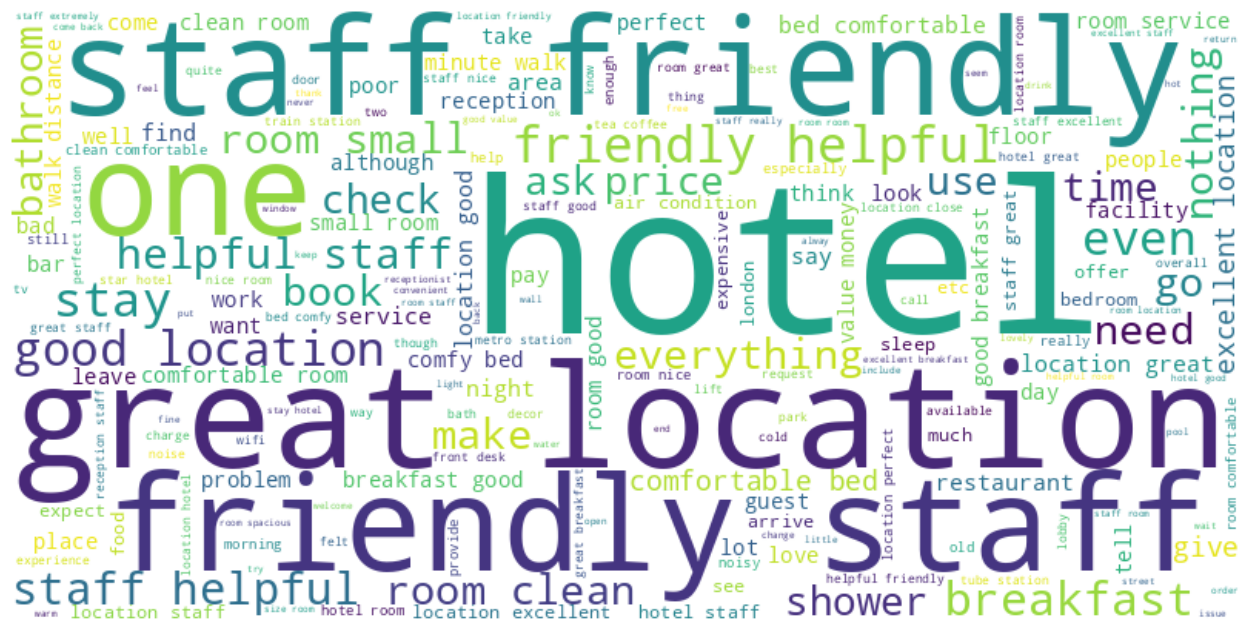

<Figure size 640x480 with 0 Axes>

In [24]:
# Convert cleaned_review column to string
df['cleaned_review'] = df['cleaned_review'].astype(str)

# Join all cleaned_review texts into a single string
text = " ".join(review for review in df.cleaned_review)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Set the figure size and DPI
plt.figure(figsize=(16,8))

# Generate and plot the word cloud
wordcloud.generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")


# Display the word cloud
plt.show()

# Save the image as a PNG file
plt.savefig("wordcloud.png", bbox_inches='tight', pad_inches=0)



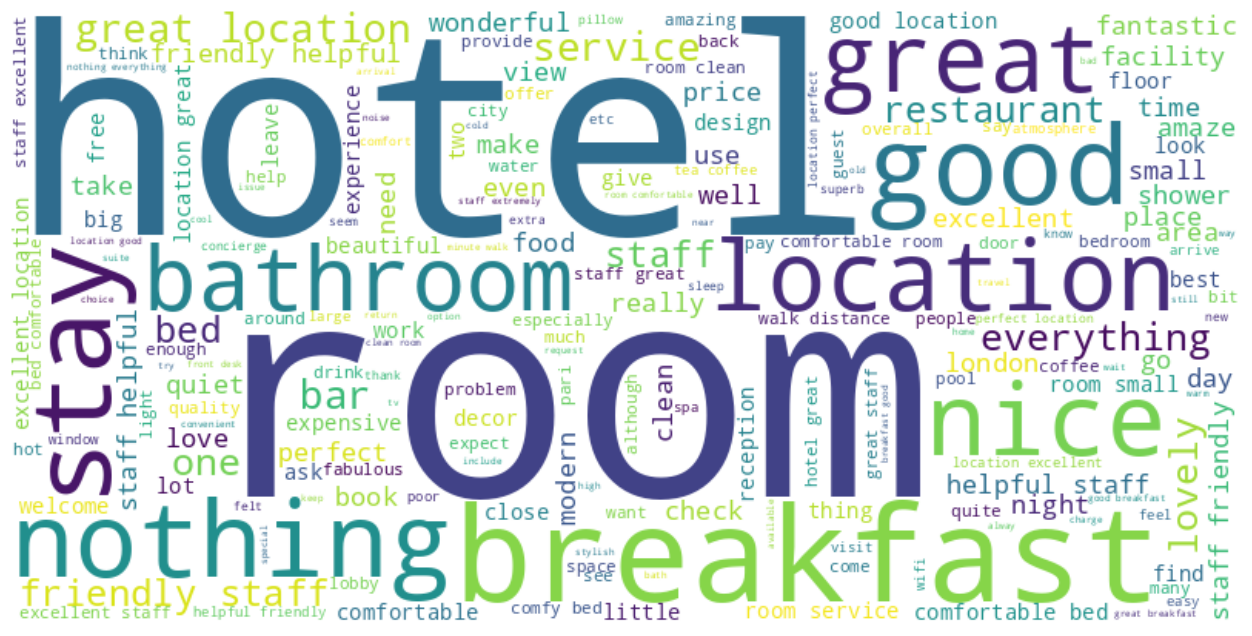

In [27]:
df = pd.read_csv("/work/hotel_reviews_df_cleaned_with_Tag_Above9.csv");
df['cleaned_review'] = df['cleaned_review'].astype(str)
text = " ".join(review for review in df.cleaned_review)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(16,8))
wordcloud.generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


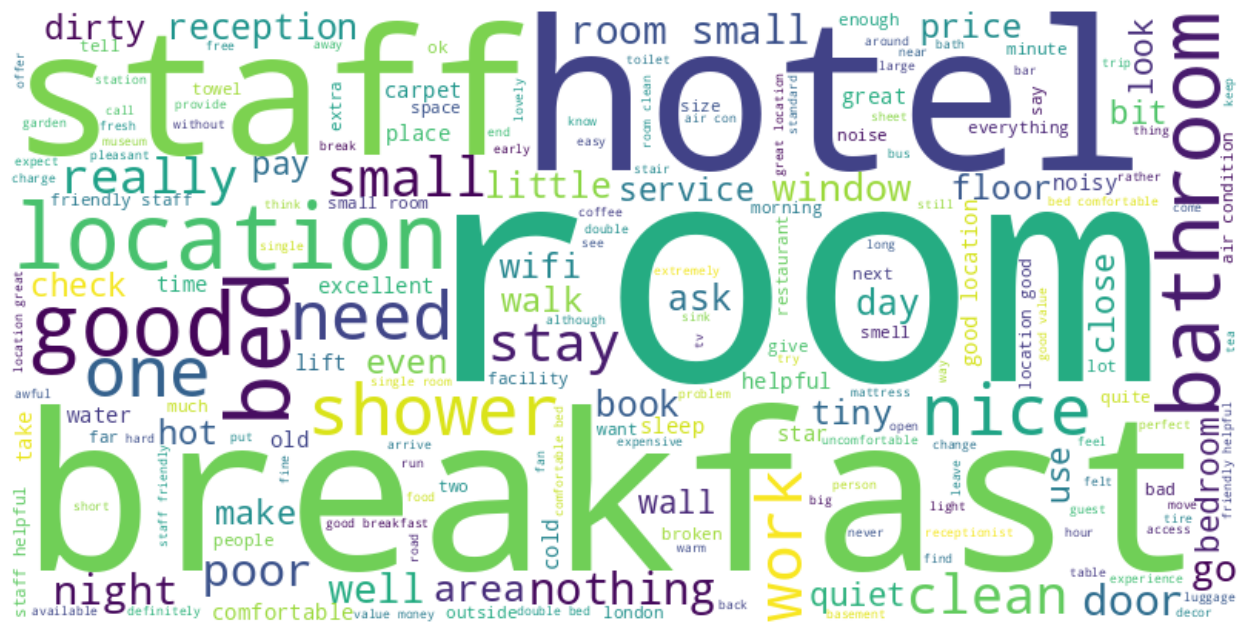

<Figure size 640x480 with 0 Axes>

In [26]:
df = pd.read_csv("/work/hotel_reviews_df_cleaned_with_Tag_Below7.csv");

df['cleaned_review'] = df['cleaned_review'].astype(str)
text = " ".join(review for review in df.cleaned_review)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(16,8))
wordcloud.generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Lossy Counting or some variation 

In [40]:
from collections import defaultdict
# Read in the CSV file
df = pd.read_csv("/work/hotel_reviews_df_cleaned_with_Tag_Above9.csv");


# Filter the dataframe where is_bad_review is 1
df = df[df['is_bad_review'] == 1]

# Convert cleaned_review column to string
df['cleaned_review'] = df['cleaned_review'].astype(str)
 
# Set the threshold frequency for Lossy Counting algorithm
threshold = 0.01

# Initialize dictionary for storing item counts
item_counts = defaultdict(int)

# Initialize dictionary for storing errors
errors = defaultdict(int)

# Initialize transaction count
transaction_count = 0

# Iterate through each review
for review in df['cleaned_review']:
    transaction_count += 1
    for item in review.split():
        item_counts[item] += 1
        if item_counts[item] + errors[item] < threshold * transaction_count:
            del item_counts[item]
            errors[item] += 1

# Sort the items by their counts in descending order
sorted_items = sorted(item_counts.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 key terms and their counts
for item, count in sorted_items[:20]:
    print(f"{item}: {count}")

room: 72
hotel: 43
staff: 33
location: 23
breakfast: 22
bad: 17
night: 13
go: 13
book: 13
bathroom: 12
bed: 12
stay: 12
good: 11
one: 10
star: 10
clean: 9
pay: 9
small: 9
nice: 9
check: 9


In [41]:
from collections import defaultdict
# Read in the CSV file
df = pd.read_csv("/work/hotel_reviews_df_cleaned_with_Tag_Below7.csv");


# Convert cleaned_review column to string
df['cleaned_review'] = df['cleaned_review'].astype(str)

# Filter the dataframe where is_bad_review is 1
df = df[df['is_bad_review'] == 1]

# Set the threshold frequency for Lossy Counting algorithm
threshold = 0.01

# Initialize dictionary for storing item counts
item_counts = defaultdict(int)

# Initialize dictionary for storing errors
errors = defaultdict(int)

# Initialize transaction count
transaction_count = 0

# Iterate through each review
for review in df['cleaned_review']:
    transaction_count += 1
    for item in review.split():
        item_counts[item] += 1
        if item_counts[item] + errors[item] < threshold * transaction_count:
            del item_counts[item]
            errors[item] += 1

# Sort the items by their counts in descending order
sorted_items = sorted(item_counts.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 key terms and their counts
for item, count in sorted_items[:20]:
    print(f"{item}: {count}")

room: 182
hotel: 82
bed: 59
breakfast: 42
staff: 40
small: 35
location: 33
bathroom: 33
nothing: 32
even: 28
star: 28
one: 27
work: 25
shower: 25
get: 25
window: 25
stay: 24
good: 24
poor: 23
dirty: 23


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ea4e772d-4daa-4712-9df2-11ccbdb38015' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>